In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

In [2]:
coumn_names = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'restecg', 'max_heartrate', 'exang', 'st_depression', 'slope', 'ca', 'thal', 'num']

cleveland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.cleveland.data')
cleveland_data.columns = coumn_names
cleveland_data['source'] = 'cleveland'
switzerland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.switzerland.data')
switzerland_data.columns = coumn_names
switzerland_data['source'] = 'switzerland'
va_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.va.data')
va_data.columns = coumn_names
va_data['source'] = 'va'
hungarian_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.hungarian.data')
hungarian_data.columns = coumn_names
hungarian_data['source'] = 'hungary'

frames = [cleveland_data, switzerland_data, va_data, hungarian_data]
data = pd.concat(frames)

data = data.replace('?', np.nan)

data.age = data.age.astype('int')

data = data.dropna()
data.sex = data.sex.astype('int')
data.sex = data.sex.apply(lambda value: 'male' if value == 1 else 'female')
data.sex = pd.Categorical(data.sex, categories=['male', 'female'])

data.chest_pain = data.chest_pain.astype('int')
data.chest_pain = pd.Categorical(data.chest_pain, categories=[1, 2, 3, 4])
data.chest_pain = data.chest_pain.apply(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value != 3 else 'non-anginal pain' if value != 4 else 'asymptomatic')
data.chest_pain = pd.Categorical(data.chest_pain, categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
data.resting_blood_pressure = data.resting_blood_pressure.astype('float64')
data.cholestoral = data.cholestoral.astype('float64')
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('float64')
data.restecg = data.restecg.astype('int')
data.restecg = data.restecg.apply(lambda value: 'normal' if value == 0 else 'ST-T wave abnormality' if value != 2 else 'left ventricular hypertrophy')
data.restecg = pd.Categorical(data.restecg, categories=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
data.max_heartrate = data.max_heartrate.astype('float64')
data.exang = data.exang.astype('int')
data.exang = data.exang.apply(lambda value: 'yes' if value == 1 else 'no')
data.exang = pd.Categorical(data.exang, categories=['yes', 'no'])
data.st_depression = data.st_depression.astype('float64')
data.slope = data.slope.astype('int')
data.slope = data.slope.apply(lambda value: 'upsloping' if value == 1 else 'flat' if value != 3 else 'downsloping')
data.slope = pd.Categorical(data.slope, categories=['upsloping', 'flat', 'downsloping'])
data.ca = data.ca.astype('float')
data.ca = data.ca.astype('int')
data.thal = data.thal.astype('float')
data.thal = data.thal.astype('int')
data.thal = data.thal.apply(lambda value: 'normal' if value == 3 else 'fixed defect' if value != 7 else 'reversable defect')
data.thal = pd.Categorical(data.thal, categories=['normal', 'fixed defect', 'reversable defect'])
data.source = pd.Categorical(data.source, categories=['cleveland', 'va', 'hungary', 'switzerland'])
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('int')
data.fasting_blood_sugar = data.fasting_blood_sugar.apply(lambda value: 'true' if value == 1 else 'false')
data.fasting_blood_sugar = pd.Categorical(data.fasting_blood_sugar, categories=['true', 'false'])


In [3]:
data.head(1000)

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heartrate,exang,st_depression,slope,ca,thal,num,source
0,67,male,atypical angina,160.0,286.0,false,left ventricular hypertrophy,108.0,yes,1.5,flat,3,normal,2,cleveland
1,67,male,atypical angina,120.0,229.0,false,left ventricular hypertrophy,129.0,yes,2.6,flat,2,reversable defect,1,cleveland
2,37,male,non-anginal pain,130.0,250.0,false,normal,187.0,no,3.5,downsloping,0,normal,0,cleveland
3,41,female,atypical angina,130.0,204.0,false,left ventricular hypertrophy,172.0,no,1.4,upsloping,0,normal,0,cleveland
4,56,male,atypical angina,120.0,236.0,false,normal,178.0,no,0.8,upsloping,0,normal,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,male,atypical angina,144.0,193.0,true,normal,141.0,no,3.4,flat,2,reversable defect,2,cleveland
299,57,male,atypical angina,130.0,131.0,false,normal,115.0,yes,1.2,flat,1,reversable defect,3,cleveland
300,57,female,atypical angina,130.0,236.0,false,left ventricular hypertrophy,174.0,no,0.0,flat,1,normal,1,cleveland
27,56,male,atypical angina,120.0,100.0,false,normal,120.0,yes,1.5,flat,0,reversable defect,1,va


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 204
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     298 non-null    int32   
 1   sex                     298 non-null    category
 2   chest_pain              298 non-null    category
 3   resting_blood_pressure  298 non-null    float64 
 4   cholestoral             298 non-null    float64 
 5   fasting_blood_sugar     298 non-null    category
 6   restecg                 298 non-null    category
 7   max_heartrate           298 non-null    float64 
 8   exang                   298 non-null    category
 9   st_depression           298 non-null    float64 
 10  slope                   298 non-null    category
 11  ca                      298 non-null    int32   
 12  thal                    298 non-null    category
 13  num                     298 non-null    int64   
 14  source                  29

In [5]:
data.source.value_counts()

cleveland      296
va               1
hungary          1
switzerland      0
Name: source, dtype: int64

Since there is not enough data left for va and hungary, these datasets are dropped completely. Only Cleveland is being analyzed. The other datasets have been dropped due to large amounts of missing values.

In [6]:
data.drop(data.index[data.source == 'va'], inplace=True)
data.drop(data.index[data.source == 'hungary'], inplace=True)
data.source.value_counts()

cleveland      294
va               0
hungary          0
switzerland      0
Name: source, dtype: int64

In [7]:
data.describe()

,age,resting_blood_pressure,cholestoral,max_heartrate,st_depression,ca,num
count,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.585034,131.55102,247.190476,149.534014,1.053401,0.673469,0.945578
std,9.040178,17.79373,52.131867,23.024187,1.167904,0.932268,1.232563
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.00000,275.750000,165.750000,1.600000,1.000000,2.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000,4.000000


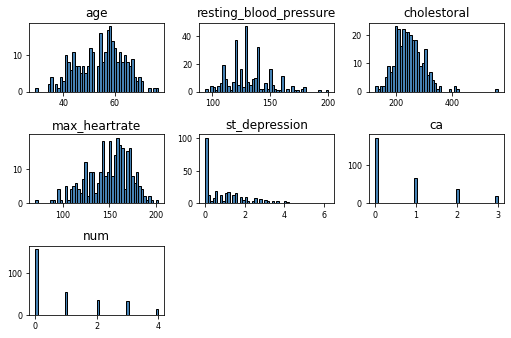

In [8]:
data.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

The age distribution seems to be rather well done in this sample. However, all other plots do not show significantly interesting results. It is hard to interpret st_depression, due to a lack of medical knowledge.

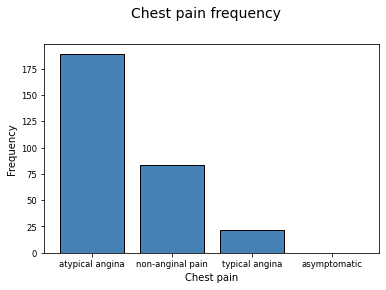

In [9]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Chest pain frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Chest pain")
ax.set_ylabel("Frequency") 
w_q = data['chest_pain'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

Again. This plot might be interesting, if I would know what atypical angina is. However it has the highest frquency in the sample.

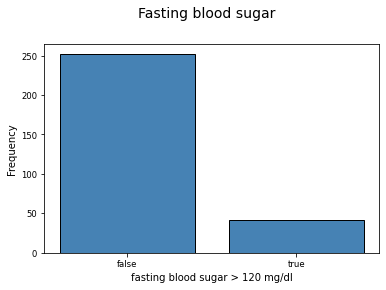

In [10]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Fasting blood sugar", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("fasting blood sugar > 120 mg/dl")
ax.set_ylabel("Frequency") 
w_q = data['fasting_blood_sugar'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

Only few of the samples show an increased bloodsugar level when fasted (not having eaten). The medical interpretation is up to a doctor, however.

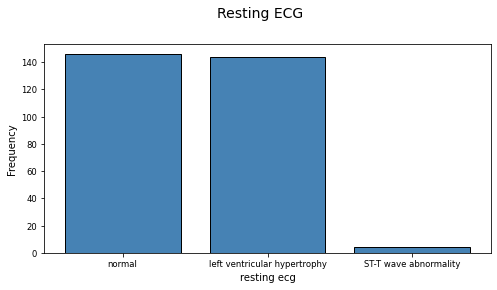

In [11]:
fig = plt.figure(figsize = (8, 4))
title = fig.suptitle("Resting ECG", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("resting ecg")
ax.set_ylabel("Frequency") 
w_q = data['restecg'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

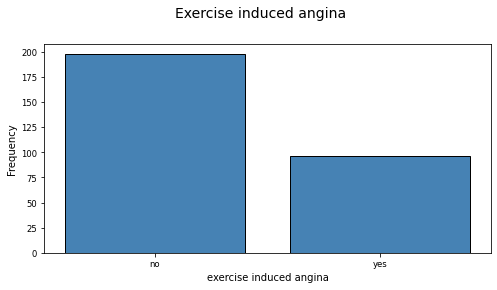

In [12]:
fig = plt.figure(figsize = (8, 4))
title = fig.suptitle("Exercise induced angina", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("exercise induced angina")
ax.set_ylabel("Frequency") 
w_q = data['exang'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

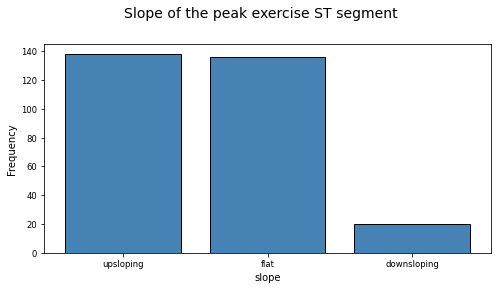

In [13]:
fig = plt.figure(figsize = (8, 4))
title = fig.suptitle("Slope of the peak exercise ST segment", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("slope")
ax.set_ylabel("Frequency") 
w_q = data['slope'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

The interesting part regarding this plot is, that it shows very similar numbers as with Resting ECG.

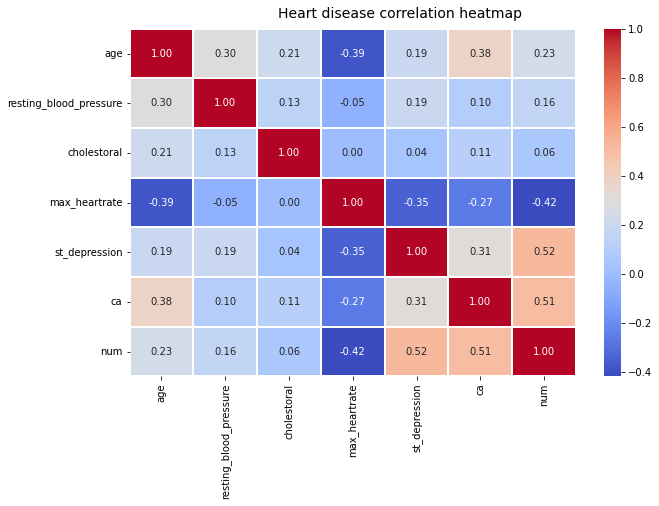

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease correlation heatmap', fontsize=14)

There is some negative correlation between age and max heart rate. In my opinion this is expected since the older a person gets, the lower the maximum heart rate might be.

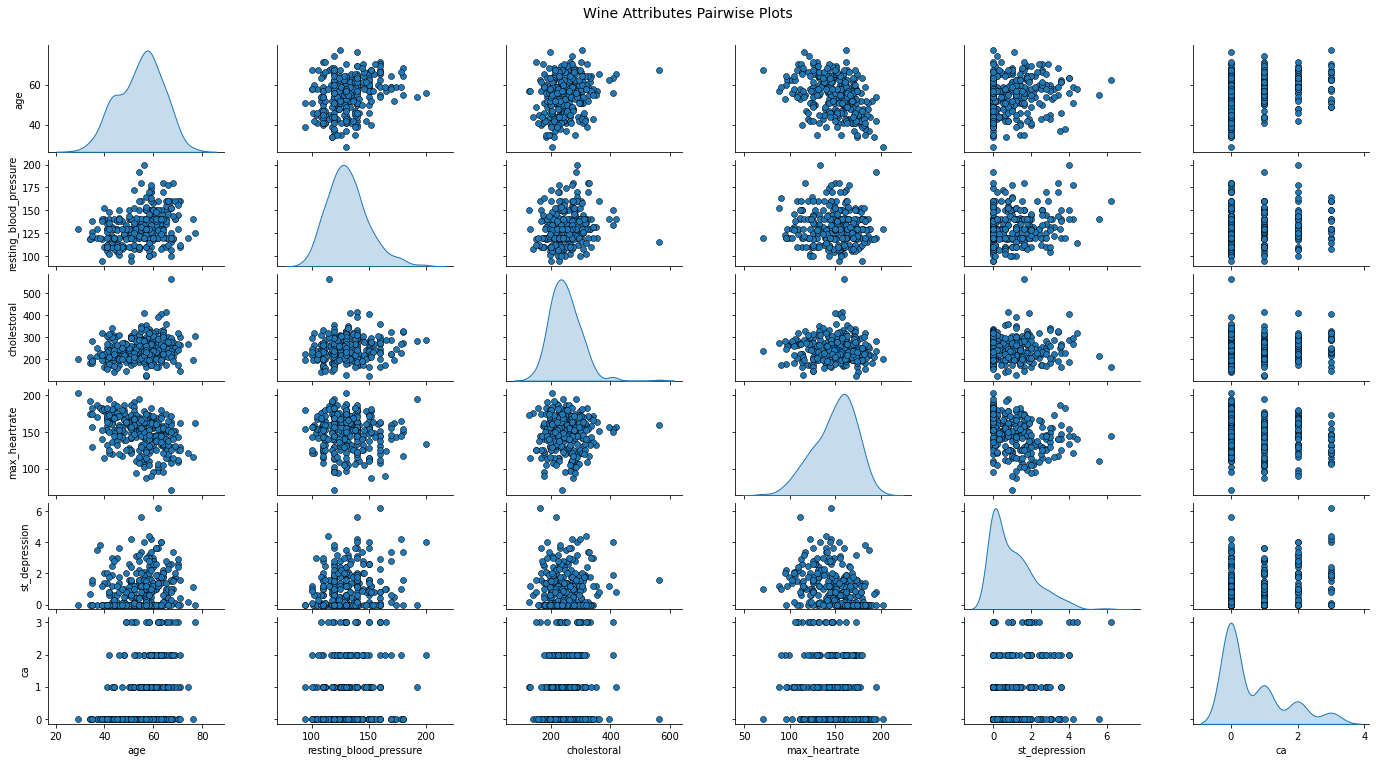

In [15]:
cols = ['age', 'resting_blood_pressure', 'cholestoral', 'max_heartrate', 'st_depression', 'ca']
pp = sns.pairplot(data[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

It seems that there might be a positive correllation between age and ca. The higher the age the higher the ca-value (number of major vessels (0-3) colored by flourosopy).

In [16]:
cols = ['age', 'resting_blood_pressure', 'cholestoral', 'max_heartrate', 'st_depression', 'ca']
subset_df = data[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, data['sex']], axis=1)
final_df.head()

,age,resting_blood_pressure,cholestoral,max_heartrate,st_depression,ca,sex
0,1.375651,1.601546,0.745718,-1.807005,0.383045,2.499816,male
1,1.375651,-0.650269,-0.349527,-0.893366,1.326510,1.425333,male
2,-1.948525,-0.087315,0.053985,1.630019,2.098435,-0.723631,male
3,-1.505302,-0.087315,-0.829898,0.977420,0.297276,-0.723631,female
4,0.156787,-0.650269,-0.215023,1.238459,-0.217341,-0.723631,male


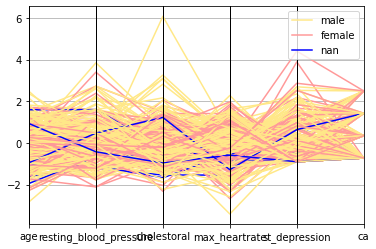

In [17]:
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'sex', color=('#FFE888', '#FF9999', '#0000FF'))

I am unable to see any pattern. The plot shows rather random values for male and female people.

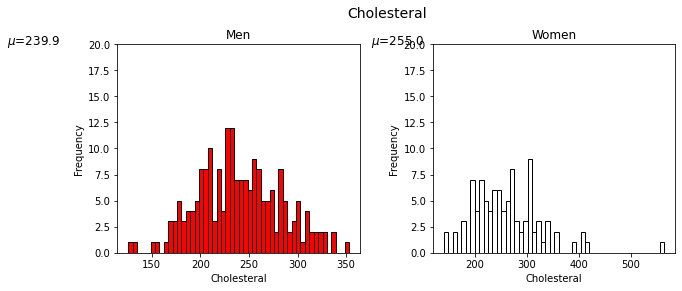

In [18]:
men = data[data.sex == 'male']
women = data[data.sex == 'female']

fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Cholesteral", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Men")
ax1.set_xlabel("Cholesteral")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 20])
ax1.text(1.2, 20, r'$\mu$='+str(round(men['cholestoral'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(men['cholestoral'], color='red', bins=50,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Women")
ax2.set_xlabel("Cholesteral")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 20])
ax2.text(0.8, 20, r'$\mu$='+str(round(women['cholestoral'].median(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(women['cholestoral'], color='white', bins=50,
                                     edgecolor='black', linewidth=1)

It seems that one woman has an especially high colesteral level.

In [19]:
women[women.cholestoral <= 500]

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heartrate,exang,st_depression,slope,ca,thal,num,source
3,41,female,atypical angina,130.0,204.0,false,left ventricular hypertrophy,172.0,no,1.4,upsloping,0,normal,0,cleveland
5,62,female,atypical angina,140.0,268.0,false,left ventricular hypertrophy,160.0,no,3.6,downsloping,2,normal,3,cleveland
6,57,female,atypical angina,120.0,354.0,false,normal,163.0,yes,0.6,upsloping,0,normal,0,cleveland
10,56,female,atypical angina,140.0,294.0,false,left ventricular hypertrophy,153.0,no,1.3,flat,0,normal,0,cleveland
17,48,female,non-anginal pain,130.0,275.0,false,normal,139.0,no,0.2,upsloping,0,normal,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,58,female,atypical angina,170.0,225.0,true,left ventricular hypertrophy,146.0,yes,2.8,flat,2,fixed defect,2,cleveland
290,55,female,atypical angina,132.0,342.0,false,normal,166.0,no,1.2,upsloping,0,normal,0,cleveland
293,63,female,atypical angina,124.0,197.0,false,normal,136.0,yes,0.0,flat,0,normal,1,cleveland
296,57,female,atypical angina,140.0,241.0,false,normal,123.0,yes,0.2,flat,0,reversable defect,1,cleveland


If we exclude her...

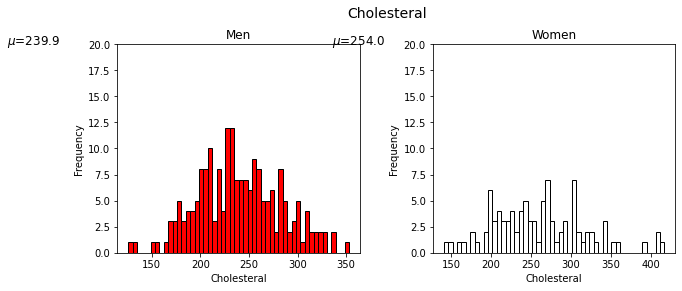

In [20]:
men = data[data.sex == 'male']
women = women[women.cholestoral <= 500]

fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Cholesteral", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Men")
ax1.set_xlabel("Cholesteral")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 20])
ax1.text(1.2, 20, r'$\mu$='+str(round(men['cholestoral'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(men['cholestoral'], color='red', bins=50,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Women")
ax2.set_xlabel("Cholesteral")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 20])
ax2.text(0.8, 20, r'$\mu$='+str(round(women['cholestoral'].median(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(women['cholestoral'], color='white', bins=50,
                                     edgecolor='black', linewidth=1)

In [21]:
data.sex.value_counts()

male      198
female     96
Name: sex, dtype: int64

Sadly, the number of men in the dataset is more than double of the number of women, so a comparison is difficult. But some women seem to have a higher cholesteral level.

Concluding, I have to note, that interpreting data without the knowledge of what the data actually signifies (the meaning behind the variables examined) is rather difficult. A medical professional should be consulted when doing these data analyses.